Reece Pretorius: V00880300 AND
Berkan Ozturk: V00892651

# Classification

The Palmer Penguins dataset is a common resource for data exploration and demonstration of data analysis techniques. It was brought into the limelight by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, which is a member of the Long Term Ecological Research Network.

The dataset includes data for 344 penguins from three different species found on three islands in the Palmer Archipelago, Antarctica. The measured attributes in the dataset include:

1. **Species**: The species of the penguin, which can be Adelie, Gentoo, or Chinstrap.
2. **Island**: The island in the Palmer Archipelago, Antarctica, where the penguin observation was made. The options are Torgersen, Biscoe, or Dream.
3. **Culmen Length (mm)**: The length of the penguin's culmen (bill).
4. **Culmen Depth (mm)**: The depth of the penguin's culmen (bill).
5. **Flipper Length (mm)**: The length of the penguin's flipper.
6. **Body Mass (g)**: The body mass of the penguin.
7. **Sex**: The sex of the penguin.

The Palmer Penguins dataset is excellent for practicing data cleaning, exploration, and visualization. 

You can find more information about the dataset, including a more detailed explanation of the variables, in this repository: [allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

For more in-depth studies or referencing, you might also consider checking out the publications from Palmer Station LTER: [pal.lternet.edu/bibliography](http://pal.lternet.edu/bibliography).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
import piplite
await piplite.install('seaborn')
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [79]:
# read penquins dataset from github
penguins = pd.read_csv('raw.githubusercontent.com_allisonhorst_palmerpenguins_master_inst_extdata_penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [80]:
# drop the year column, it is not useful for our analysis, 
# and it has no adequate explanation in the dataset documentation
penguins = penguins.drop('year', axis=1)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


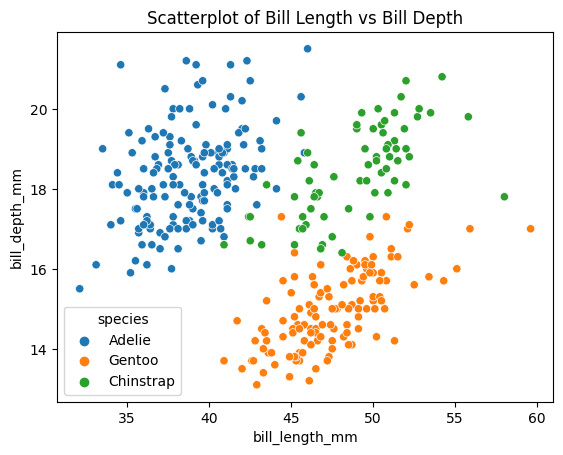

In [81]:
# Create a scatterplot of bill length vs bill depth using seaborn, hue by species.
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

# Add a title.
plt.title('Scatterplot of Bill Length vs Bill Depth')

plt.show()

In [82]:
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',	'body_mass_g']
categorical_features = ['island', 'sex']

In [83]:
# create a pipeline to impute missing values with the mean and scale numeric features
numeric_pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler())
])

# create a pipeline to impute missing values with the most frequent value and one-hot encode categorical features
categorical_pipeline = Pipeline([
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder())
])

# create a column transformer to apply the numeric and categorical pipelines to the correct features
# use remainder='passthrough' to keep the remaining features in the dataframe
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_features),
    ('categorical', categorical_pipeline, categorical_features)
], remainder='passthrough')

# fit_transform the preprocessor on the penguins dataset
# convert the result to a dataframe
# use the preprocessor's get_feature_names_out() method to get the column names
transformed_data = preprocessor.fit_transform(penguins)
transformed_df = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

print(transformed_df.columns)

# display the first 5 rows of the preprocessed dataframe
transformed_df.head()

Index(['numeric__bill_length_mm', 'numeric__bill_depth_mm',
       'numeric__flipper_length_mm', 'numeric__body_mass_g',
       'categorical__island_Biscoe', 'categorical__island_Dream',
       'categorical__island_Torgersen', 'categorical__sex_female',
       'categorical__sex_male', 'remainder__species'],
      dtype='object')


,numeric__bill_length_mm,numeric__bill_depth_mm,numeric__flipper_length_mm,numeric__body_mass_g,categorical__island_Biscoe,categorical__island_Dream,categorical__island_Torgersen,categorical__sex_female,categorical__sex_male,remainder__species
0,-0.887081,0.787743,-1.422488,-0.565789,0.0,0.0,1.0,0.0,1.0,Adelie
1,-0.813494,0.126556,-1.065352,-0.503168,0.0,0.0,1.0,1.0,0.0,Adelie
2,-0.66632,0.431719,-0.422507,-1.192003,0.0,0.0,1.0,1.0,0.0,Adelie
3,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Adelie
4,-1.328605,1.092905,-0.565361,-0.941517,0.0,0.0,1.0,1.0,0.0,Adelie


In [84]:
# separate the features from the target
# call the features X and the target y
X = transformed_df.drop(columns=['remainder__species'])
y = transformed_df['remainder__species']

In [85]:
# setup binary classification for Adelie vs. rest of species
# use the Adelie species as the positive class
# create a new target called y_adelie
y_adelie = np.where(y == 'Adelie', 1, 0)

In [86]:
# build an SGDClassifier model using X and y
# use random_state=42 for reproducibility
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_adelie, test_size=0.2, random_state=42)

model = SGDClassifier(random_state=42)

model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [87]:
# compute the accuracy using cross_val_score with cv=10
accuracy = cross_val_score(model, X_train, y_train, cv=10)

# Print the accuracy scores
print("Accuracy scores:", accuracy)

Accuracy scores: [0.96428571 1.         1.         1.         1.         0.96296296
 1.         1.         1.         1.        ]


In [88]:
# compute the mean accuracy
print("Mean accuracy:", accuracy.mean())

Mean accuracy: 0.9927248677248677


In [89]:
# predict the target using cross_val_predict with cv=10
# call the result y_train_pred
y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)

print("Predicted values:", y_train_pred)

Predicted values: [1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1
 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1]


In [90]:
# compute the confusion matrix
confusion_mat = confusion_matrix(y_train, y_train_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[154   1]
 [  1 119]]


In [91]:
# compute the precision score using precision_score()
precision = precision_score(y_train, y_train_pred, average=None)
# precision = precision_score(y_train, y_train_pred, average='weighted')

# Print the precision score
print("Precision score:", precision)

Precision score: [0.99354839 0.99166667]


In [92]:
# compute the recall score using recall_score()
recall = recall_score(y_train, y_train_pred, average=None)
# recall = recall_score(y_train, y_train_pred, average='weighted')

# Print the recall score
print("Recall score:", recall)

Recall score: [0.99354839 0.99166667]


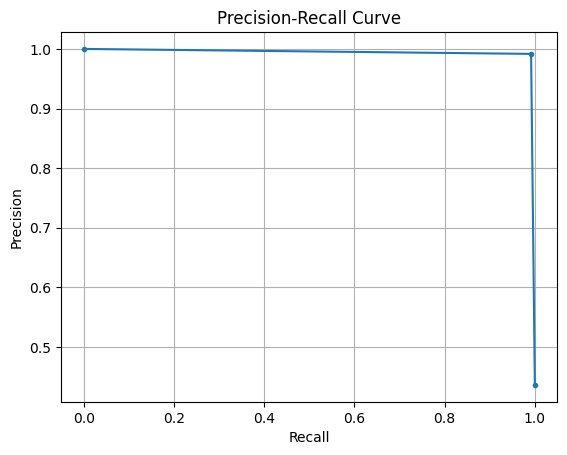

In [93]:
# draw the precision-recall curve
# call the result precisions, recalls, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred)

# Plot the precision-recall curve
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

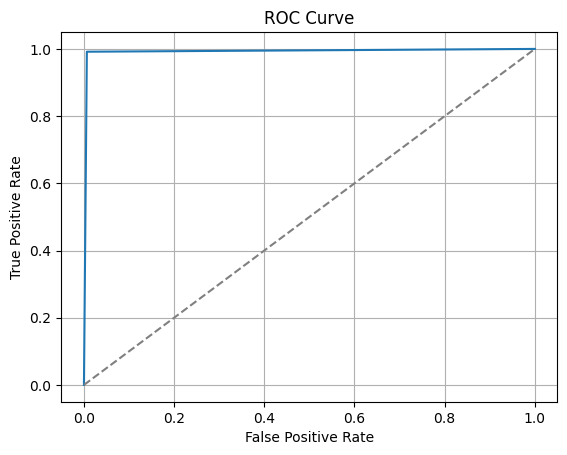

In [94]:
# call the result fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# plot the roc curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [95]:
# now let's do multiclass classification
# build an SGDClassifier model using X and y
# use random_state=42 for reproducibility
model = SGDClassifier(random_state=42)

# Fit the model on the data
model.fit(X, y)

SGDClassifier(random_state=42)

In [96]:
# show the mean accuracy using cross_val_score with cv=10
mean_accuracy = cross_val_score(model, X, y, cv=10).mean()

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9883193277310924


In [97]:
# predict the target using cross_val_predict with cv=10
# call the result y_train_pred
# show the confusion matrix
y_train_pred = cross_val_predict(model, X, y, cv=10)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y, y_train_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[150   2   0]
 [  1  67   0]
 [  1   0 123]]


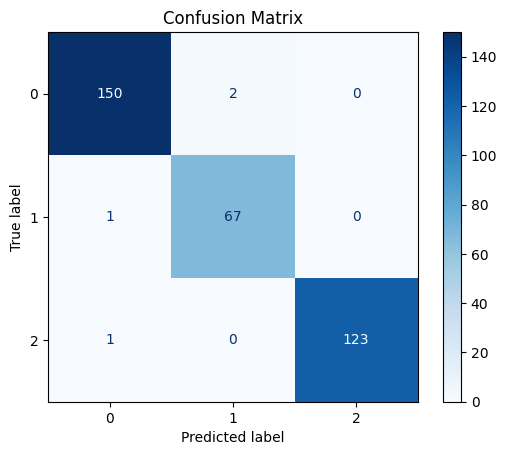

In [98]:
# use ConfusionMatrixDisplay to display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)

# Plot the confusion matrix
display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()